In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-29 16:13:15,632 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 16:13:15,634 - settings - Setting database.user to celiib
INFO - 2021-04-29 16:13:15,634 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 16:13:15,636 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-29 16:13:15,636 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 16:13:15,659 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-29 16:13:16,202 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 16:13:16,210 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 16:13:16,211 - settings - Setting database.user to celiib
INFO - 2021-04-29 16:13:16,212 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 16:13:16,213 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 16:13:16,214 - settings - Setting database.user to celiib
INFO - 2021-04-29 16:13:16,215 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 16:13:16,216 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 16:13:16,886 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-29 16:13:17,116 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 16:13:17,117 - settings - Setting database.user to celiib
INFO - 2021-04-29 16:13:17,117 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 16:13:17,120 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 16:13:17,867 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 3
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136194103510, 864691136333776819, 864691136105498585,
       864691136333787571, 864691136105493209])


--- Working on Neuron 864691136194103510 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1296877.86366175  567079.46753724  736487.98061507]--------
winning_downstream = 17,error_downstream = [18 23] 
coordinate [1296877.86366175  567079.46753724  736487.98061507] had error branches [18 23]--------


 ----- Working on coordinate 1: [1323169.08622588  578468.81703289  721080.94742324]--------
winning_downstream = 79,error_downstream = [83 84] 
coordinate [1323169.08622588  578468.81703289  721080.94742324] had error branches [83 84]--------


 ----- Working on coordinate 2: [1324441.   577072.8  721566.6]--------
winning_downstream = 96,error_downstream = [95 89] 
coordinate [1324441.   577072.8  721566.6] had error branches [95 89]--------


 ----- Working on coordinate 3: [1324721.18252054  591998.58916451  782574.47770318]--------
winning_downstream = None,error_downstream = [ 91  94 100  74] 
coordinate [1324721.18252054  591998.58916

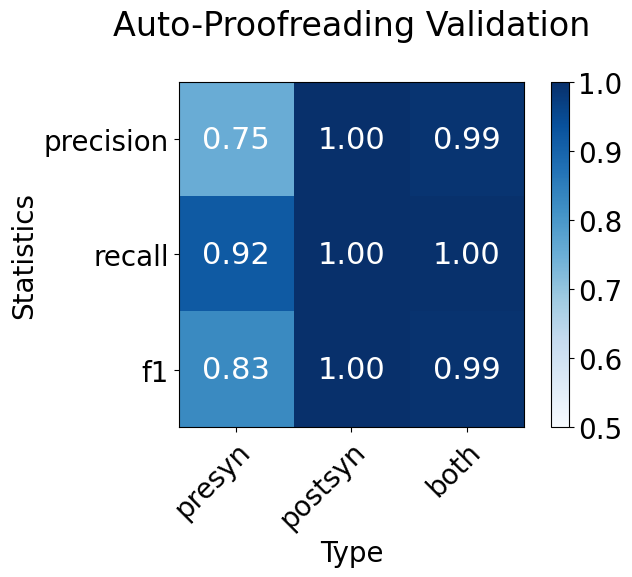

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136194103510_validation_df.pbz2
File size is 0.068446 MB
Total time for neuron 864691136194103510: 323.0500063896179

--- Working on Neuron 864691136333776819 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [643355.43275131 854792.91818012 764761.23483779]--------
winning_downstream = 15,error_downstream = [13 14 16  6] 
coordinate [643355.43275131 854792.91818012 764761.23483779] had error branches [13 14 16  6]--------
limb_branch_dict_to_cancel = {'L4': array([13, 14, 16,  6])}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {'L0': [19], 'L4': [17]}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 7, # error synapses  = 43, # error presyns = 29
For postsyn: # valid synapses = 2028, # error synapses  = 2, # error presyns = 0
Synapsse Results:
Total Number of

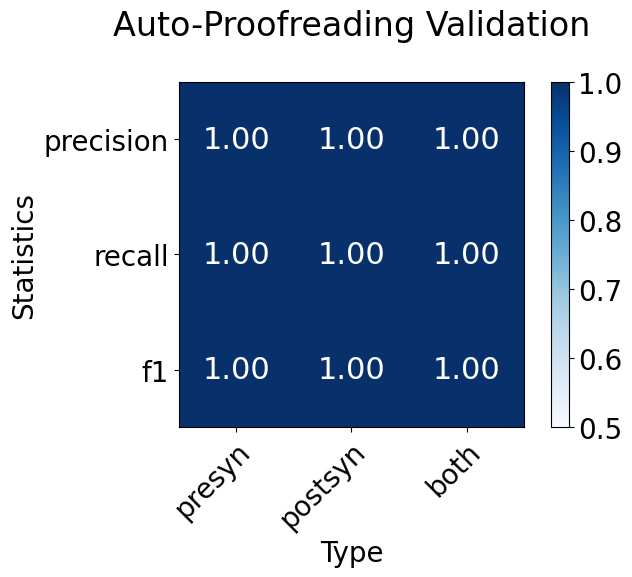

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136333776819_validation_df.pbz2
File size is 0.041798 MB
Total time for neuron 864691136333776819: 106.26746535301208

--- Working on Neuron 864691136105498585 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [619189.60858089 909005.11752672 921858.16539071]--------
winning_downstream = 218,error_downstream = [220 223] 
coordinate [619189.60858089 909005.11752672 921858.16539071] had error branches [220 223]--------


 ----- Working on coordinate 1: [622150.46160674 906032.29381224 916506.374183  ]--------
winning_downstream = 224,error_downstream = [225 226] 
coordinate [622150.46160674 906032.29381224 916506.374183  ] had error branches [225 226]--------


 ----- Working on coordinate 2: [659580.21590418 912086.0525754  858423.77709203]--------
winning_downstream = None,error_downstream = [] 
coordinate [659580.21590418 912086.0525754  858423.

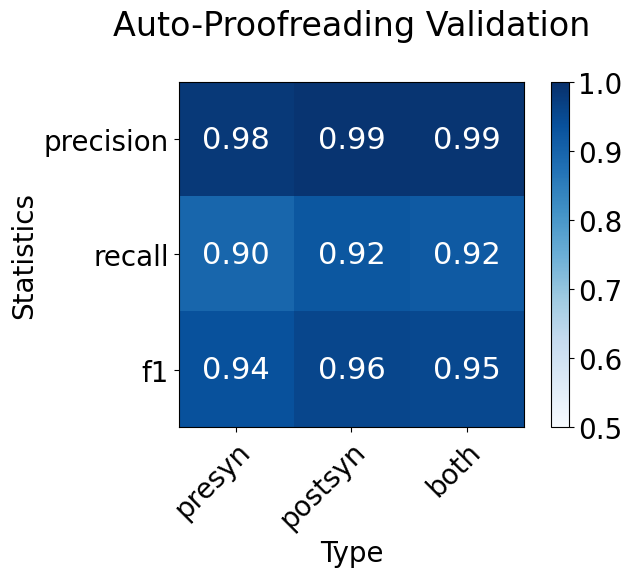

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136105498585_validation_df.pbz2
File size is 0.024622 MB
Total time for neuron 864691136105498585: 274.75046491622925

--- Working on Neuron 864691136333787571 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 235, # error presyns = 21
For postsyn: # valid synapses = 5605, # error synapses  = 6, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5846
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 235
n_valid_syn_ids_postsyn = 5605
n_errored_syn_ids_postsyn = 6
Segment Id = 864691136333787571
Postsyn counts:
TP:5601
TN:2
FP:4
FN:4
Presyn counts:
TP:0
TN:211
FP:0
FN:3


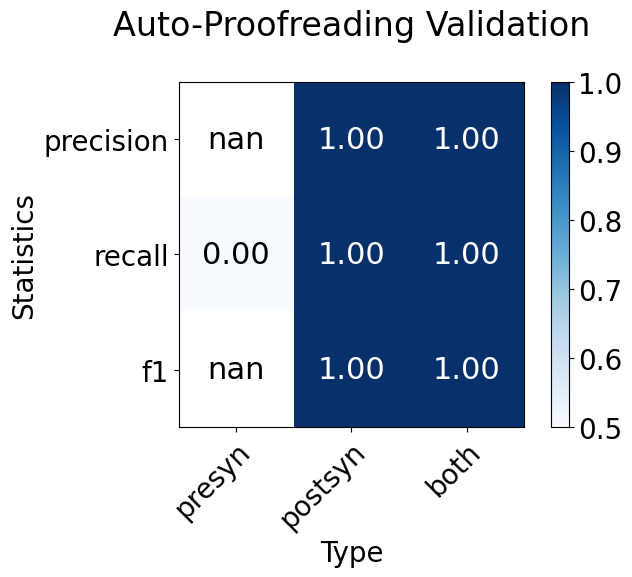

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136333787571_validation_df.pbz2
File size is 0.115763 MB
Total time for neuron 864691136333787571: 113.13710832595825

--- Working on Neuron 864691136105493209 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [ 857274.3  735210.6 1094806. ]--------
winning_downstream = 11,error_downstream = [12 13] 
coordinate [ 857274.3  735210.6 1094806. ] had error branches [12 13]--------


 ----- Working on coordinate 1: [ 877379.9  722813.8 1023782. ]--------
winning_downstream = 9,error_downstream = [19 20] 
coordinate [ 877379.9  722813.8 1023782. ] had error branches [19 20]--------


 ----- Working on coordinate 2: [1071735.12377996 1055951.07117419 1053248.49149601]--------
winning_downstream = 37,error_downstream = [42 35] 
coordinate [1071735.12377996 1055951.07117419 1053248.49149601] had error branches [42 35]--------


 ----- Working on coordinat

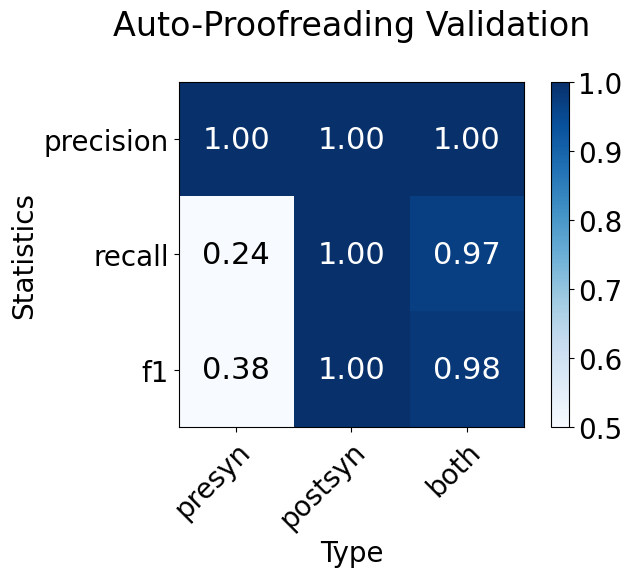

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136105493209_validation_df.pbz2
File size is 0.060109 MB
Total time for neuron 864691136105493209: 176.17592310905457


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")